# Optimization
---
In this notebook, we use optimization concepts to solve the charging station allocation problem. We use the following strategy to frame and solve our problem:

- Defining the optimization task
- Gathering the required informations and constraints 
- Framing the optimization problem
- Defining and solving the optimization problem using the PuLP library
- Result Analysis and visualization

## The Optimization Task
---
We assume that we are the operator of a fully electrified taxi fleet in Chicago. We would want to know how many charging stations we need and where to place them.

Since we had access only to community area taxi informations, we can not frame and solve the problem in terms of the exact location of the stations, but rather in terms of how many charging stations are required in each community area.

## Required Information & Constraints
---
First, we define are constraints and gather the necessary information regarding the EV-Fleet operations. The inforamtions presented below are gathered from the relevant literature regarding the EV-Charging Stations allocations problem.


### Budget Requirements
---
We assume that we have 500.000$ available budget for installing the charging stations of our taxi fleet. The budget is derived from the following information:

<div>
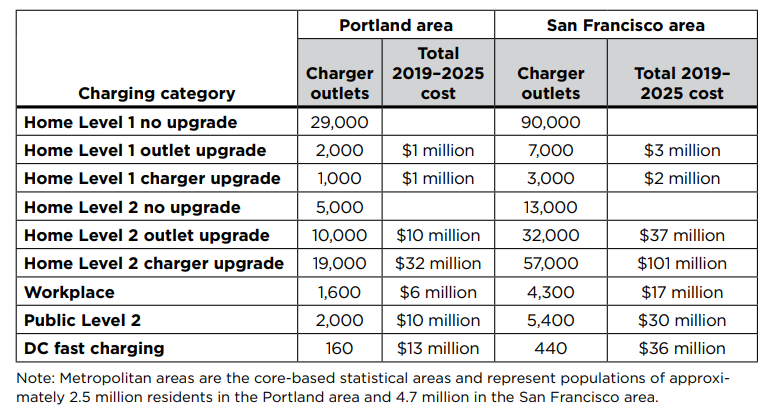
</div>

Assuming a level 2 and 3 public charging station 500.000 dollor budget seems a reasonable estimate.

_Source: Estimating electric vehicle charging infrastructure costs across major U.S. metropolitan areas, INTERNATIONAL COUNCIL ON CLEAN TRANSPORTATION 2019_

### Charging Station Type & Maximal Power Needed
---
We know that the commonly used charging stations are Level 2, with 3.3 - 6.6 kW AC power and a range of 10-20 miles. These Charging stations are used in home and workplace as well as in public. But these charging stations should be combined with the commercially used charging stations DC fast (level 3) since the typical charging time of a level 2 charging station is between 4-6 hours.


<div>
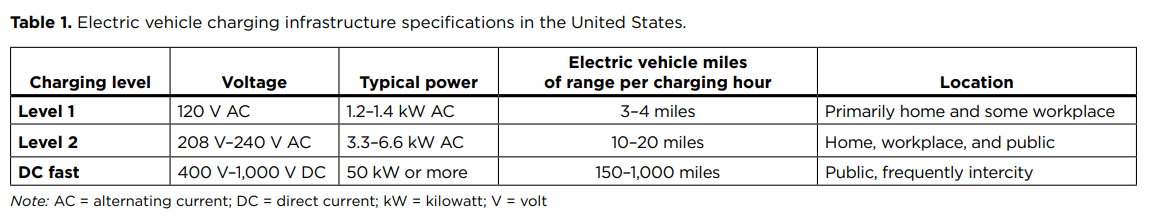
</div>

_Source: Estimating electric vehicle charging infrastructure costs across major U.S. metropolitan areas, INTERNATIONAL COUNCIL ON CLEAN TRANSPORTATION 2019_

### EV-Fleet Vehicles
---
In this project we assume that the EV-Fleet company operates with 100 Tesla Model S 70D vehicles throughout the city of Chicago.
The Following table shows the technical information of this vehicle:

| Weight     | Battery Capacity           | Charging Power  | Number of Operating Cars  |
    | --- |--| ---|---|
| 2,286 kg| 70 kWh |60 kW | 100 |

### Charging Duration
---
As mentioned above, we assume two type of charging stations, namely level 2 with the typical charging duration of 4-6 hours and the commercial level 3 charging station with the charging duration of 20-30 minutes. 

### Charging Station Costs
---
The following show the costs of charging stations in the U.S.

_for the sake of simplicity we do not consider tax credits or other tangible benefits given to the operators of EV-Fleet_

<table><thead><tr><th><strong> </strong></th><th><strong>Level 1</strong></th><th><strong>Level 2</strong></th><th><strong>Level 3</strong></th>  </tr></thead><tbody><tr><td><strong>Price(\$)</strong></td><td>300 - 600</td><td>500 - 2,200</td><td>20,000</td></tr><tr><td><strong>Amps</strong></td><td>20</td><td>40</td><td>500</td></tr><tr><td><strong>Volts</strong></td><td>120</td><td>240</td><td>480 - 800</td></tr><tr><td><strong>kW</strong></td><td>1.4</td><td>6.2 - 7.6</td><td>Up to 150</td></tr><tr><td><strong>Charge Per Hour</strong></td><td>4 - 5 miles</td><td>12 - 60 miles</td><td>250 - 300 miles</td></tr></tbody></table>

_Source: https://www.homeadvisor.com/cost/garages/install-an-electric-vehicle-charging-station/#level2_

### Constraints Table
---
The following is a summary of all the constraints for this optimization problem. 

_Note: This problem can be expanded in various ways, the current formulation of constraints is based on simple assumptions_

| Constraint Name     | Constraint Value |
| --- |--| 
| Budget | \$500.000 |
| Level 2 Station Cost | \$2.000 |
| Level 3 Station Cost | \$20.000 |
| Level 2 Charging Duration | 6 hours |
| Level 3 Charging Duration | 0.5 hours |
| Fleet Size | 100 |

## Framing The Optimization Problem
---
Using the above constraints we frame a mathematical model of our problem. To find out the number of each charging station in different parts of Chicago, we use the concept of Hexagons. Thus, we discretize the city with 25 Hexagons (Res. 6):

$
H_i = H_{1,...,25}
$

Each Hexagon has a specific expected daily demand denoted as:

$
\DeclareMathOperator{\EX}{\mathbb{E}}
\EX(H_i)
$

We denote Level 2 charging stations as $\gamma$ and level 3 charging stations as $\omega$

To formulate the number of charging stations at each Hexagon, we have: 

$
\gamma_i+ \omega_i
$

We add the cost of each charging station as the coefficient, Thus the overall station costs per Hexagon is: (Let $C_i$ be the overall cost of charging stations at $H_i$)

$C_i=20000\omega_i+2000\gamma_i$

To account for the Budget constraint, we have:

$\sum_{i=1}^{25}C_i \leq 500000$

And since the problem is a integer optimization problem, we have:

$\omega,\gamma \in \mathbb{Z}^+$

As we already mentioned, we assume that we have a fleet of 100 Tesla model S cars. It takes about 6 hours to fully charge them at a level 2 Station and about 30 minutes at a level 3 commercial station, we know: (let $Ca$ be the capacity factor of each station type)

$Ca_{i}= \frac{\Delta t}{Charging \ Duration \ (hour)}$

_Note: For the sake of model simplicity we assume only one charging port per station. This assumption can be adjusted in other model variations._

Taking the above charging duration and our daily temporal resolution into account, we have:

$Ca_{\gamma}= 24/6 = 4$

$Ca_{\omega}= 24/0.5 = 48$

To adjust the daily demand to our fleet size: (let $N$ be the number of operating taxis in Chicago in 2015 and $S$ be the our fleet size)

$
\EX(H)_{adjusted} = \frac{\EX(H) * S}{N}
$

As our last piece of notation, we introduce the throughput at each location:

$Y_i = Y_{1,...,25} = Ca_{\gamma}{\gamma_i} + Ca_{\omega}{\omega_i}$

### Optimization Infrastructure
---
The Table below shows the nomenclature of our optimization problem:

| Symbol     | Unit | Description |
| --- | --- | --- | 
| $\gamma_i$ | - | number of level 2 charging stations at location cluster $i$ |
| $\omega_i$| - | number of level 3 charging stations at location cluster $i$ |
| $Ca_{\gamma}$ | vehicle/day | level 2 station charging capacity |
| $Ca_{\omega}$ | vehicle/day | level 3 station charging capacity |
| $Y_i$ | - | throughput at location cluster $i$ |
| $\EX(H_i)$ | - | expected charging demand at location cluster $i$ |
| $H_i$ | - | charging location cluster $i$ |
| $C_i$ | dollor | charging station costs at location cluster $i$ |
| $S$ | - | fleet size |
| $N$ | - | number of operating taxis  |

### Optimization Problem
---
After defining our variables and notation, we write down our mathematical optimization problem, to maximize the location throughput in each cluster:

$
\begin{equation}
\begin{aligned}
    \max \quad & \sum_i Ca_{\gamma}{\gamma_i} + Ca_{\omega}{\omega_i}  \\
\textrm{s.t.} \quad & \sum_i 2000\gamma_i + 20000\omega_i \leq 500000 \quad \quad (1)\\ 
\quad \quad \quad & Ca_{\gamma}{\gamma_i} + Ca_{\omega}{\omega_i} \leq \EX(H_i)_{adjusted} \quad (2,...,26)\\
\quad \quad \quad & \omega_i,\gamma_i \in \mathbb{Z}^+ \quad (27)\\
\end{aligned}
\end{equation}
$

Whereby the $\omega_i,\gamma_i $ are the decision variables.

## Solving The Optimization Problem
---
In this section we solve the defined optimization problem using the pulp library. We leverage our data to find the average demand. Furthermore, we discretize the daily demand in Chicago using H3 Hexagons with resolution 6. This allows us to aggregate the demand in 25 locations in Chicago.

In [1]:
import os
os.chdir(os.path.dirname(os.getcwd()))
import utils,preprocessing,eda,geo_engineering,optimization
import pandas as pd
import numpy as np
import h3.api.numpy_int as h3
from pulp import *

### Data Prepration
---
To get the expected demand in each hexagon we aggregate our Chicago taxi data from 2015 based on the spatial attributes.

In [2]:
# Takes few minutes to run (16 GB RAM)
chicago_df = utils.read_parquet('Taxi_Trips_Cleaned.parquet', 
                                columns=['Trip ID','Pickup Community Area','Dropoff Community Area'])

chicago_df,hex6_geo_json,hex7_geo_json = geo_engineering.add_community_areas_with_hexagons(chicago_df
                                                                                ,return_geojson=True)
chicago_df.head()

,Trip ID,Pickup Community Area,Dropoff Community Area,geometry_pickup,Community Area Center_pickup,Community Area Center Lat_pickup,Community Area Center Long_pickup,hex_6_pickup,hex_7_pickup,hex_6_geometry_pickup,hex_7_geometry_pickup,geometry_dropoff,Community Area Center_dropoff,Community Area Center Lat_dropoff,Community Area Center Long_dropoff,hex_6_dropoff,hex_7_dropoff,hex_6_geometry_dropoff,hex_7_geometry_dropoff
0,70bf5261bff10278c0a99bf9b6dfd77b59da3f7b,1,1,"MULTIPOLYGON (((-87.65456 41.99817, -87.65574 ...",POINT (-87.67017 42.00962),42.009623,-87.670167,604157783335501823,608661382912540671,"{'type': 'Polygon', 'coordinates': [((-87.6674...","{'type': 'Polygon', 'coordinates': [((-87.6674...","MULTIPOLYGON (((-87.65456 41.99817, -87.65574 ...",POINT (-87.67017 42.00962),42.009623,-87.670167,604157783335501823,608661382912540671,"{'type': 'Polygon', 'coordinates': [((-87.6674...","{'type': 'Polygon', 'coordinates': [((-87.6674..."
1,8a01052178bc15bd780297e93aaf328dc631ef3c,8,8,"MULTIPOLYGON (((-87.62446 41.91157, -87.62459 ...",POINT (-87.63331 41.89960),41.899602,-87.633309,604157777161486335,608661376772079615,"{'type': 'Polygon', 'coordinates': [((-87.6009...","{'type': 'Polygon', 'coordinates': [((-87.6304...","MULTIPOLYGON (((-87.62446 41.91157, -87.62459 ...",POINT (-87.63331 41.89960),41.899602,-87.633309,604157777161486335,608661376772079615,"{'type': 'Polygon', 'coordinates': [((-87.6009...","{'type': 'Polygon', 'coordinates': [((-87.6304..."
2,097e67b0a173656e34f6ea4e8077c802ed55ab9f,8,8,"MULTIPOLYGON (((-87.62446 41.91157, -87.62459 ...",POINT (-87.63331 41.89960),41.899602,-87.633309,604157777161486335,608661376772079615,"{'type': 'Polygon', 'coordinates': [((-87.6009...","{'type': 'Polygon', 'coordinates': [((-87.6304...","MULTIPOLYGON (((-87.62446 41.91157, -87.62459 ...",POINT (-87.63331 41.89960),41.899602,-87.633309,604157777161486335,608661376772079615,"{'type': 'Polygon', 'coordinates': [((-87.6009...","{'type': 'Polygon', 'coordinates': [((-87.6304..."
3,35c0c4859532bafa924ee1e50d3b4aae575a63fd,8,6,"MULTIPOLYGON (((-87.62446 41.91157, -87.62459 ...",POINT (-87.63331 41.89960),41.899602,-87.633309,604157777161486335,608661376772079615,"{'type': 'Polygon', 'coordinates': [((-87.6009...","{'type': 'Polygon', 'coordinates': [((-87.6304...","MULTIPOLYGON (((-87.64102 41.95480, -87.64101 ...",POINT (-87.65600 41.94423),41.944227,-87.655999,604157777027268607,608661376637861887,"{'type': 'Polygon', 'coordinates': [((-87.6341...","{'type': 'Polygon', 'coordinates': [((-87.6637..."
4,95f482f9494be7695fe051572d7928090f46fcb2,22,21,"MULTIPOLYGON (((-87.68284 41.93223, -87.68284 ...",POINT (-87.69916 41.92276),41.922760,-87.699156,604157779443187711,608661378969894911,"{'type': 'Polygon', 'coordinates': [((-87.7143...","{'type': 'Polygon', 'coordinates': [((-87.7019...","MULTIPOLYGON (((-87.68799 41.93610, -87.68798 ...",POINT (-87.71121 41.93867),41.938666,-87.711211,604157779443187711,608661378953117695,"{'type': 'Polygon', 'coordinates': [((-87.7143...","{'type': 'Polygon', 'coordinates': [((-87.7229..."


In [3]:
#Reading the daily demand
daily_demand_hex_6 = utils.read_parquet('daily_demand_hex_6')

In [4]:
daily_demand_hex_6.head()

,Trip Start Timestamp,hex_6_pickup,Demand (D)
0,2015-01-01,604157731930111999,3
1,2015-01-01,604157747230932991,664
2,2015-01-01,604157747365150719,4
3,2015-01-01,604157748304674815,7
4,2015-01-01,604157777027268607,15844


In [5]:
#Factorizing the hexagons for sake of better readability
daily_demand_hex_6['hex_6_pickup'] = daily_demand_hex_6['hex_6_pickup'].astype(str)
daily_demand_hex_6['hexagon_number'] = pd.factorize(daily_demand_hex_6['hex_6_pickup'])[0] + 1
daily_demand_hex_6.head()

,Trip Start Timestamp,hex_6_pickup,Demand (D),hexagon_number
0,2015-01-01,604157731930111999,3,1
1,2015-01-01,604157747230932991,664,2
2,2015-01-01,604157747365150719,4,3
3,2015-01-01,604157748304674815,7,4
4,2015-01-01,604157777027268607,15844,5


In [6]:
#Data Aggregation
expected_demand_in_area = daily_demand_hex_6.groupby(['hexagon_number']).mean()
expected_demand_in_area.rename(columns={"Demand (D)": "Expected Daily Taxi Demand"}, inplace=True)

In [7]:
expected_demand_in_area

,Expected Daily Taxi Demand
hexagon_number,
1,1.977099
2,1117.336986
3,3.042813
4,18.230556
5,7582.164384
6,35853.071233
7,17.846575
8,20.528767
9,1750.739726


### Objective Function Under Constraints
---
After preparing our data set, we implement a function to represent our mathematical optimization function. Our function is mathematically defined as:


Since we have a extremely skewed demand distribution, we add an upper bound to our decision variables,firstly to avoid ev-charging stations being allocated only in the hexagon with the most daily demand and secondly to give the drivers more flexibility to charge their vehicles at different spots. We add the following constraints at each location. so the adjusted optimization problem is as following:

$
\begin{equation}
\begin{aligned}
    \max \quad & \sum_i Ca_{\gamma}{\gamma_i} + Ca_{\omega}{\omega_i}  \\
\textrm{s.t.} \quad & \sum_i 2000\gamma_i + 20000\omega_i \leq 500000 \quad \quad (1)\\ 
\quad \quad \quad & Ca_{\gamma}{\gamma_i} + Ca_{\omega}{\omega_i} \leq \EX(H_i)_{adjusted} \quad (2,...,26)\\
\quad \quad \quad & \omega_i,\gamma_i \in \mathbb{Z}^+ \quad (27)\\
\quad \quad \quad & \gamma_i \leq 10 \quad (28)\\
\quad \quad \quad & \omega_i \leq 5 \quad (29)\\
\end{aligned}
\end{equation}
$

### Problem Definition in PuLP
---
This section outlines the problem definition in PuLP.

In [8]:
#Constant Definitions
recharge_time_l2 = 6
recharge_time_l3 = 0.5
time_horizon = 24
capacity_gamma = time_horizon/recharge_time_l2
capacity_omega = time_horizon/recharge_time_l3
number_of_operating_taxis = 4861
fleet_size = 100
budget = 500000.0
level_2_station_cost = 2000
level_3_station_cost = 20000

#Problem Definiton
allocation_problem = LpProblem("EV-Charging Station Allocation Problem",LpMaximize)

#Cluster list
hexagons = list(expected_demand_in_area.index)

#Expected Demand
expected_demand = dict(zip(hexagons,expected_demand_in_area['Expected Daily Taxi Demand']))

#Variable Definition
gamma_vars = LpVariable.dicts("Gamma",hexagons,lowBound=0,upBound=10,cat='Integer')
omega_vars = LpVariable.dicts("Omega",hexagons,lowBound=0,upBound=5,cat='Integer')

#Mathematical Problem
allocation_problem += lpSum([capacity_gamma*gamma_vars[i] + capacity_omega*omega_vars[i] for i in hexagons])

#Constraints
allocation_problem += (lpSum([level_2_station_cost*gamma_vars[i] + level_3_station_cost*omega_vars[i] for i in hexagons])
                       <= budget,'Budget Constraint')
for i in hexagons:
    allocation_problem += (lpSum(capacity_gamma*gamma_vars[i]+capacity_omega*omega_vars[i]) 
                           <= expected_demand[i]*fleet_size/number_of_operating_taxis,f'Cluster {i} Constraint')

In [9]:
allocation_problem

EV-Charging_Station_Allocation_Problem:
MAXIMIZE
4.0*Gamma_1 + 4.0*Gamma_10 + 4.0*Gamma_11 + 4.0*Gamma_12 + 4.0*Gamma_13 + 4.0*Gamma_14 + 4.0*Gamma_15 + 4.0*Gamma_16 + 4.0*Gamma_17 + 4.0*Gamma_18 + 4.0*Gamma_19 + 4.0*Gamma_2 + 4.0*Gamma_20 + 4.0*Gamma_21 + 4.0*Gamma_22 + 4.0*Gamma_23 + 4.0*Gamma_24 + 4.0*Gamma_25 + 4.0*Gamma_3 + 4.0*Gamma_4 + 4.0*Gamma_5 + 4.0*Gamma_6 + 4.0*Gamma_7 + 4.0*Gamma_8 + 4.0*Gamma_9 + 48.0*Omega_1 + 48.0*Omega_10 + 48.0*Omega_11 + 48.0*Omega_12 + 48.0*Omega_13 + 48.0*Omega_14 + 48.0*Omega_15 + 48.0*Omega_16 + 48.0*Omega_17 + 48.0*Omega_18 + 48.0*Omega_19 + 48.0*Omega_2 + 48.0*Omega_20 + 48.0*Omega_21 + 48.0*Omega_22 + 48.0*Omega_23 + 48.0*Omega_24 + 48.0*Omega_25 + 48.0*Omega_3 + 48.0*Omega_4 + 48.0*Omega_5 + 48.0*Omega_6 + 48.0*Omega_7 + 48.0*Omega_8 + 48.0*Omega_9 + 0.0
SUBJECT TO
Budget_Constraint: 2000 Gamma_1 + 2000 Gamma_10 + 2000 Gamma_11
 + 2000 Gamma_12 + 2000 Gamma_13 + 2000 Gamma_14 + 2000 Gamma_15
 + 2000 Gamma_16 + 2000 Gamma_17 + 2000 Gamma_18 +

### Solving The Optimzation Problem
---
As shown above we have a linear programming problem under constraints, we use the PuLP library to solve this problem.

In [10]:
allocation_problem.solve()

1

In [11]:
#Optimization Solution
for v in allocation_problem.variables():
    print(v.name, "=", v.varValue)

Gamma_1 = 0.0
Gamma_10 = 4.0
Gamma_11 = 0.0
Gamma_12 = 1.0
Gamma_13 = 0.0
Gamma_14 = 0.0
Gamma_15 = 0.0
Gamma_16 = 0.0
Gamma_17 = 0.0
Gamma_18 = 1.0
Gamma_19 = 0.0
Gamma_2 = 5.0
Gamma_20 = 0.0
Gamma_21 = 1.0
Gamma_22 = 0.0
Gamma_23 = 0.0
Gamma_24 = 0.0
Gamma_25 = 0.0
Gamma_3 = 0.0
Gamma_4 = 0.0
Gamma_5 = 2.0
Gamma_6 = 10.0
Gamma_7 = 0.0
Gamma_8 = 0.0
Gamma_9 = 9.0
Omega_1 = 0.0
Omega_10 = 3.0
Omega_11 = 0.0
Omega_12 = 0.0
Omega_13 = 0.0
Omega_14 = 0.0
Omega_15 = 0.0
Omega_16 = 0.0
Omega_17 = 0.0
Omega_18 = 0.0
Omega_19 = 1.0
Omega_2 = 0.0
Omega_20 = 0.0
Omega_21 = 1.0
Omega_22 = 0.0
Omega_23 = 0.0
Omega_24 = 0.0
Omega_25 = 0.0
Omega_3 = 0.0
Omega_4 = 0.0
Omega_5 = 3.0
Omega_6 = 5.0
Omega_7 = 0.0
Omega_8 = 0.0
Omega_9 = 0.0


### Result Analysis
---
Our Solver found the global maximum of the linear objective function. We give a brief descrption of our results in this section.

In [12]:
#Adding results to a dataframe
geo_map = chicago_df[['hex_6_pickup','hex_6_geometry_pickup']].drop_duplicates(subset='hex_6_pickup')
hexagon_map = daily_demand_hex_6[['hex_6_pickup','hexagon_number']].drop_duplicates()
charging_station_results = optimization.add_optimization_results_to_data_set(expected_demand_in_area,geo_map,hexagon_map,allocation_problem)

In [13]:
charging_station_results

,hexagon_number,Expected Daily Taxi Demand,Level 2 Station,Level 3 Station,hex_6_pickup,hex_6_geometry_pickup
0,1,1.977099,0,0,604157731930111999,"{'type': 'Polygon', 'coordinates': [((-87.5484..."
1,2,1117.336986,5,0,604157747230932991,"{'type': 'Polygon', 'coordinates': [((-87.7744..."
2,3,3.042813,0,0,604157747365150719,"{'type': 'Polygon', 'coordinates': [((-87.7411..."
3,4,18.230556,0,0,604157748304674815,"{'type': 'Polygon', 'coordinates': [((-87.6281..."
4,5,7582.164384,2,3,604157777027268607,"{'type': 'Polygon', 'coordinates': [((-87.6341..."
5,6,35853.071233,10,5,604157777161486335,"{'type': 'Polygon', 'coordinates': [((-87.6009..."
6,7,17.846575,0,0,604157778906316799,"{'type': 'Polygon', 'coordinates': [((-87.7610..."
7,8,20.528767,0,0,604157779040534527,"{'type': 'Polygon', 'coordinates': [((-87.7277..."
8,9,1750.739726,9,0,604157779443187711,"{'type': 'Polygon', 'coordinates': [((-87.7143..."
9,10,7919.783562,4,3,604157779577405439,"{'type': 'Polygon', 'coordinates': [((-87.6809..."


In [31]:
optimization.show_stations_on_map(charging_station_results,hex6_geo_json)

As we already expected the has allocated most of the charging stations around city center and near lake Michigan, where the most taxi demand is concentrated. It is important to note the allocation of fast charging stations only in city center areas and near the Chicago airport. 

_The exact locations of the stations are unknown to us since we had only community area informations about the trips. the above map shows a uniform location distribution for stations in each hexagon. Use the choropleth option to see the underlying hexagonal structure._